In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from scipy import stats
from matplotlib.colors import LogNorm  

warnings.filterwarnings('ignore')

/Users/jessekommandeur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
HP100_exp1 = pd.read_csv('../Data/Experiment 3/HP100c.csv')
HP100_exp1.tail()

,Amino Acid Length,Num Hydrophobic,Num Polar,1D protein,2D protein,Amino Acids on Grid,Trimmed 2D protein,Shape 2D protein,Amino Acid Order,H-Bonds,H-Ratio,Recursions,Time Taken (s)
19995,100,61,39,"['H', 'H', 'P', 'P', 'H', 'H', 'H', 'P', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' '' '' '' '' '' '' '' '' '' 'H' 'P' '' '' ...,"(16, 19)","[('H', (100, 100)), ('H', (99, 100)), ('P', (9...",16,0.16,0,9.536743e-07
19996,100,19,81,"['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' '' '' '' '' 'P' 'P' '' '' '' '' '' '' '' ...,"(14, 18)","[('P', (100, 100)), ('P', (101, 100)), ('P', (...",1,0.01,28,9.536743e-07
19997,100,57,43,"['P', 'P', 'P', 'H', 'P', 'H', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,"(16, 21)","[('P', (100, 100)), ('P', (99, 100)), ('P', (9...",20,0.20,0,1.192093e-06
19998,100,88,12,"['H', 'H', 'H', 'H', 'H', 'P', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' '' '' '' '' '' '' '' '' '' 'H' 'H' 'P' 'H...,"(17, 15)","[('H', (100, 100)), ('H', (99, 100)), ('H', (9...",34,0.34,1,9.536743e-07
19999,100,3,97,"['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' '' '' 'P' 'P' '' '' '' '' '' '' '' '' '' ...,"(11, 34)","[('P', (100, 100)), ('P', (101, 100)), ('P', (...",0,0.00,1,9.536743e-07


In [3]:
HP100_exp2 = pd.read_csv('../Data/Experiment 4/HP100a.csv')
HP100_exp2.tail()

,Amino Acid Length,Num Hydrophobic,Num Polar,1D protein,2D protein,Amino Acids on Grid,Trimmed 2D protein,Shape 2D protein,Amino Acid Order,Amino Acid Direction,H-Bonds,H-Ratio,Recursions,Time Taken (s)
19995,100,37,63,"['P', 'P', 'P', 'P', 'P', 'P', 'H', 'P', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,"(16, 22)","[('P', (100, 100)), ('P', (101, 100)), ('P', (...","['Start', 'straight', 'left', 'right', 'right'...",3,0.03,3,0.000000e+00
19996,100,26,74,"['P', 'P', 'P', 'P', 'P', 'P', 'H', 'H', 'P', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' '' 'P' 'H' 'P' 'P' 'H' '' '' '' '' '' '' ...,"(19, 17)","[('P', (100, 100)), ('P', (101, 100)), ('P', (...","['Start', 'straight', 'straight', 'left', 'str...",4,0.04,4,0.000000e+00
19997,100,55,45,"['H', 'H', 'P', 'P', 'P', 'P', 'H', 'P', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' '' '' '' '' '' 'H' 'H' 'H' '' 'P' 'P' 'P'...,"(22, 15)","[('H', (100, 100)), ('H', (99, 100)), ('P', (9...","['Start', 'straight', 'left', 'straight', 'str...",7,0.07,337,0.000000e+00
19998,100,47,53,"['P', 'P', 'H', 'H', 'H', 'H', 'P', 'P', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' 'P' 'P' '' '' '' '' '' '' '' '' '' '' '' ...,"(24, 17)","[('P', (100, 100)), ('P', (99, 100)), ('H', (9...","['Start', 'straight', 'right', 'straight', 'st...",6,0.06,2,9.536743e-07
19999,100,85,15,"['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,100,[['' 'H' '' '' '' '' '' '' '' '' '' '' '' '' '...,"(22, 17)","[('H', (100, 100)), ('H', (100, 101)), ('H', (...","['Start', 'straight', 'left', 'straight', 'rig...",32,0.32,0,9.536743e-07


In [4]:
results1 = HP100_exp1.groupby('Amino Acid Length').agg(
    Median_Recursions=('Recursions', 'median'),
    Mean_Recursions=('Recursions', 'mean'),
    Std_Recursions=('Recursions', 'std'),
    Max_Recursions=('Recursions', 'max'),
    Min_Recursions=('Recursions', 'min')
).reset_index()

df_recursions1 = pd.DataFrame(results1)
df_recursions1

results2 = HP100_exp2.groupby('Amino Acid Length').agg(
    Median_Recursions=('Recursions', 'median'),
    Mean_Recursions=('Recursions', 'mean'),
    Std_Recursions=('Recursions', 'std'),
    Max_Recursions=('Recursions', 'max'),
    Min_Recursions=('Recursions', 'min')
).reset_index()

df_recursions2 = pd.DataFrame(results2)
df_recursions2.tail()

,Amino Acid Length,Median_Recursions,Mean_Recursions,Std_Recursions,Max_Recursions,Min_Recursions
15,80,1.0,48.595,647.645010,14902,0
16,85,2.0,35.675,463.558367,13545,0
17,90,2.0,206.264,3819.203707,104617,0
18,95,2.0,218.278,2934.882590,62582,0
19,100,2.0,813.585,15849.859664,474767,0


<Figure size 1152x576 with 0 Axes>

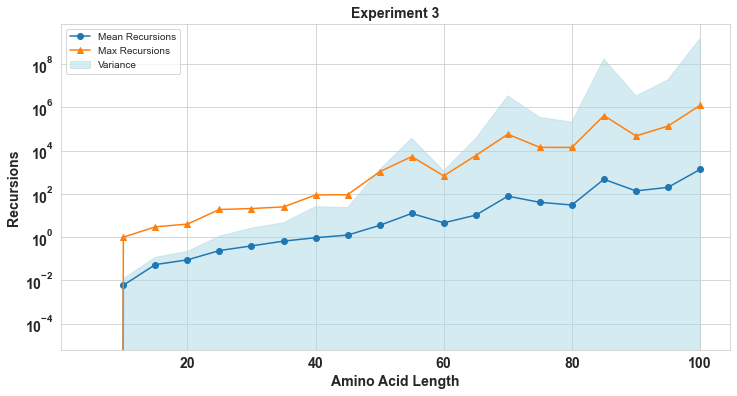

In [5]:
# Convert DataFrame columns to NumPy arrays
amino_acid_length = df_recursions1['Amino Acid Length'].values
mean_recursions = df_recursions1['Mean_Recursions'].values
max_recursions = df_recursions1['Max_Recursions'].values
std_recursions = df_recursions1['Std_Recursions'].values

# Set plot background color to a grey-blue
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid", {"axes.facecolor": "#FFFFFF"})
plt.figure(figsize=(12, 6))

# Plotting Mean and Max Recursions
plt.plot(amino_acid_length, mean_recursions, marker='o', label='Mean Recursions')
plt.plot(amino_acid_length, max_recursions, marker='^', label='Max Recursions')

# Calculating variance from standard deviation
df_recursions1['Variance_Recursions'] = std_recursions ** 2

# Convert variance to NumPy array
variance_recursions = df_recursions1['Variance_Recursions'].values

# Plotting the variance as an area around the mean
plt.fill_between(amino_acid_length,
                 mean_recursions - variance_recursions,
                 mean_recursions + variance_recursions, 
                 color='lightblue', alpha=0.5, label='Variance')

# Customizing the plot
def customize_plot():
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.xlabel("Amino Acid Length", fontsize=14, fontweight='bold')
    plt.ylabel("Recursions", fontsize=14, fontweight='bold')

customize_plot()
plt.title('Experiment 3', fontweight='bold', size=14)
plt.yscale('log')  # Using a log scale for the y-axis due to wide range of values

# Positioning the legend in the top left corner
plt.legend(loc='upper left')

plt.grid(True)

# Show and save the plot
# plt.savefig("recursions experiment 3.png", format='png', dpi=1000)
plt.show()

<Figure size 1152x576 with 0 Axes>

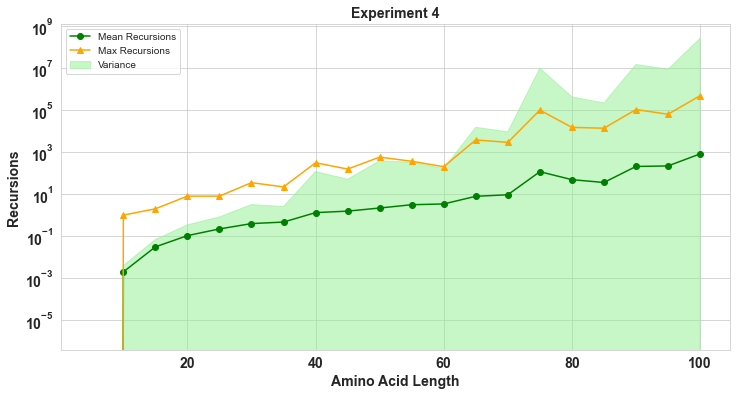

In [6]:
# Convert DataFrame columns to NumPy arrays
amino_acid_length = df_recursions2['Amino Acid Length'].values
mean_recursions = df_recursions2['Mean_Recursions'].values
max_recursions = df_recursions2['Max_Recursions'].values
std_recursions = df_recursions2['Std_Recursions'].values

# Set plot background color to a grey-blue
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid", {"axes.facecolor": "#FFFFFF"})
plt.figure(figsize=(12, 6))

# Plotting Mean and Max Recursions
plt.plot(amino_acid_length, mean_recursions, marker='o', label='Mean Recursions', color='green')
plt.plot(amino_acid_length, max_recursions, marker='^', label='Max Recursions', color='orange')

# Calculating variance from standard deviation
df_recursions1['Variance_Recursions'] = std_recursions ** 2

# Convert variance to NumPy array
variance_recursions = df_recursions1['Variance_Recursions'].values

# Plotting the variance as an area around the mean
plt.fill_between(amino_acid_length,
                 mean_recursions - variance_recursions,
                 mean_recursions + variance_recursions, 
                 color='lightgreen', alpha=0.5, label='Variance')

# Customizing the plot
def customize_plot():
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.xlabel("Amino Acid Length", fontsize=14, fontweight='bold')
    plt.ylabel("Recursions", fontsize=14, fontweight='bold')

customize_plot()
plt.title('Experiment 4', fontweight='bold', size=14)
plt.yscale('log')  # Using a log scale for the y-axis due to wide range of values

# Positioning the legend in the top left corner
plt.legend(loc='upper left')

plt.grid(True)

# Show and save the plot
# plt.savefig("recursions experiment 4.png", format='png', dpi=1000)
plt.show()

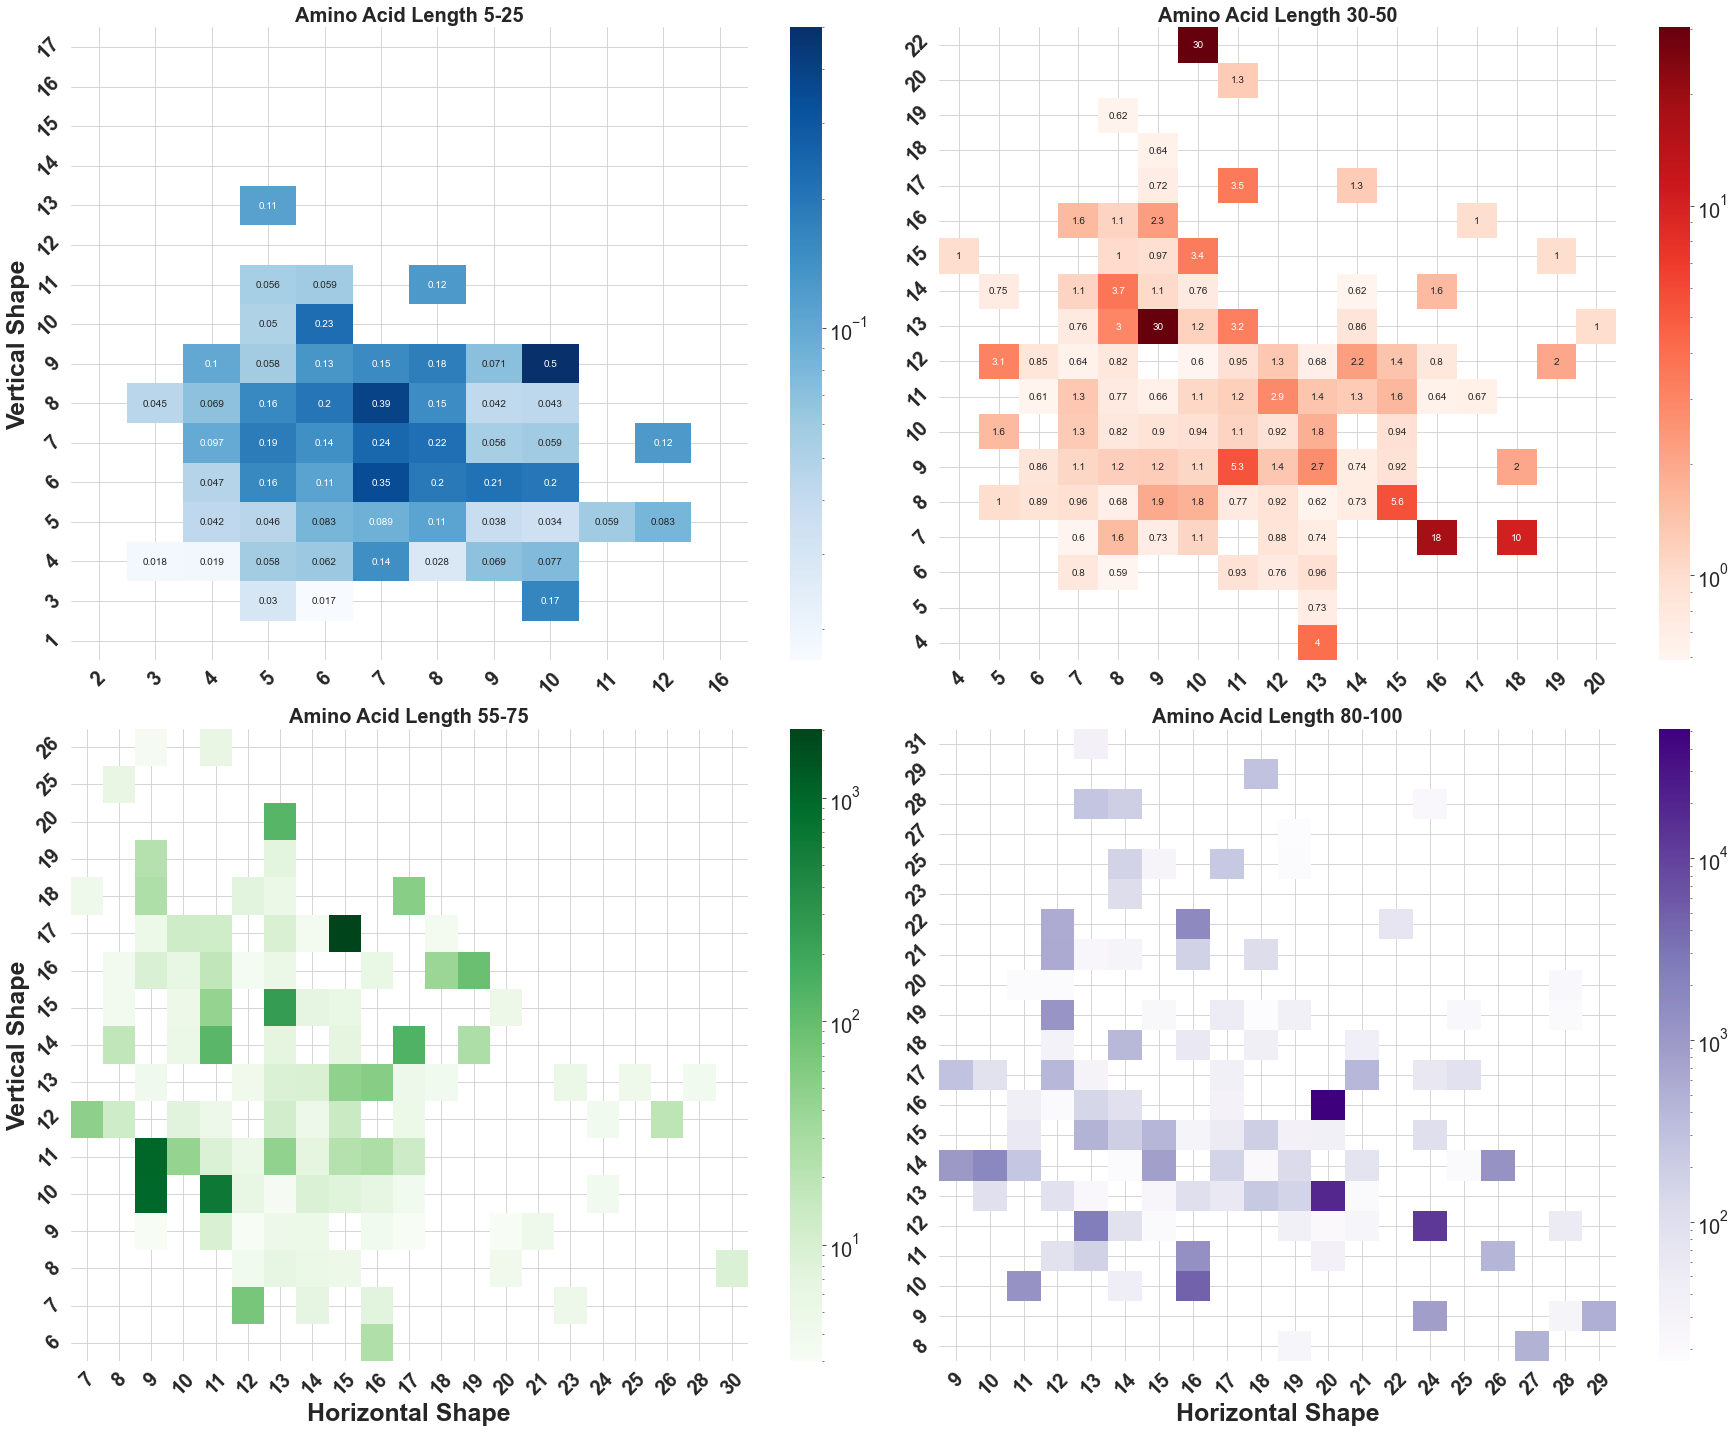

In [7]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm  # Import LogNorm for log-scale colormap

warnings.filterwarnings('ignore')

def plot_heatmap_for_shape_and_recursions(dataframe, min_length, max_length, ax, colormap, show_x_label, show_y_label, show_annotations=True):
    # Filter dataframe based on amino acid length range
    filtered_df = dataframe[(dataframe['Amino Acid Length'] > min_length) & (dataframe['Amino Acid Length'] <= max_length)]

    # Extract shape values
    filtered_df['Shape1'] = filtered_df['Shape 2D protein'].str.extract(r'\((.*?),').astype(int)
    filtered_df['Shape2'] = filtered_df['Shape 2D protein'].str.extract(r',\s(.*?)\)').astype(int)

    # Group by shape combinations and calculate the mean recursion value
    shape_combinations = filtered_df.groupby(['Shape1', 'Shape2'])['Recursions'].mean().reset_index()

    # Sort by mean recursion in descending order and select the top 150 combinations
    top_combinations = shape_combinations.sort_values(by='Recursions', ascending=False).head(100)

    # Create a pivot table for the heatmap
    pivot_table = top_combinations.pivot(index='Shape1', columns='Shape2', values='Recursions')

    # Ensure all values are positive for logarithmic scale
    pivot_table[pivot_table <= 0] = np.nan  # Replace non-positive values with NaN

    # Check if pivot_table is not empty and has valid data
    if not pivot_table.empty and pivot_table.notna().any().any():
        # Get the maximum and minimum values for consistent log scale range
        log_min = np.nanmin(np.log10(pivot_table.to_numpy()))
        log_max = np.nanmax(np.log10(pivot_table.to_numpy()))

        # Check if log_min and log_max are valid
        if np.isfinite(log_min) and np.isfinite(log_max) and log_min < log_max:
            # Create custom LogNorm colormap with consistent range
            log_norm = LogNorm(vmin=10**log_min, vmax=10**log_max)

            # Plotting with custom log-scale colormap and annotations as specified
            sns.heatmap(pivot_table, cmap=colormap, ax=ax, cbar=True, cbar_kws={'label': ''}, annot=show_annotations, norm=log_norm)
        else:
            # Fallback: Plot without log scale if log_min or log_max are invalid
            sns.heatmap(pivot_table, cmap=colormap, ax=ax, cbar=True, cbar_kws={'label': ''}, annot=show_annotations)
    else:
        print(f"No valid data for range {min_length}-{max_length}")

    ax.set_title(f'Amino Acid Length {min_length+5}-{max_length}', fontsize=20, fontweight='bold')
    ax.set_xlabel('Horizontal Shape' if show_x_label else '', fontsize=25, fontweight='bold')
    ax.set_ylabel('Vertical Shape' if show_y_label else '', fontsize=25, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, fontweight='bold', rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=20, fontweight='bold', rotation=45)
    ax.invert_yaxis()

    # Adjust color bar label size
    if ax.collections:  # Check if there is a heatmap to adjust color bar
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=20)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 20))
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

length_ranges = [(0, 25), (25, 50), (50, 75), (75, 100)]
colormaps = ['Blues', 'Reds', 'Greens', 'Purples']

x_labels = [False, False, True, True]  # Show x labels for plots 3 and 4
y_labels = [True, False, True, False]  # Show y labels for plots 1 and 3
show_annotations = [True, True, False, False]  # Show annotations for plots 1 and 2

for ax, (min_length, max_length), colormap, x_label, y_label, show_annot in zip(axs.ravel(), length_ranges, colormaps, x_labels, y_labels, show_annotations):
    plot_heatmap_for_shape_and_recursions(HP100_exp1, min_length, max_length, ax, colormap, x_label, y_label, show_annot)

plt.tight_layout()
# plt.savefig("Recursion distribution.png", format='png', dpi=800)
plt.show()


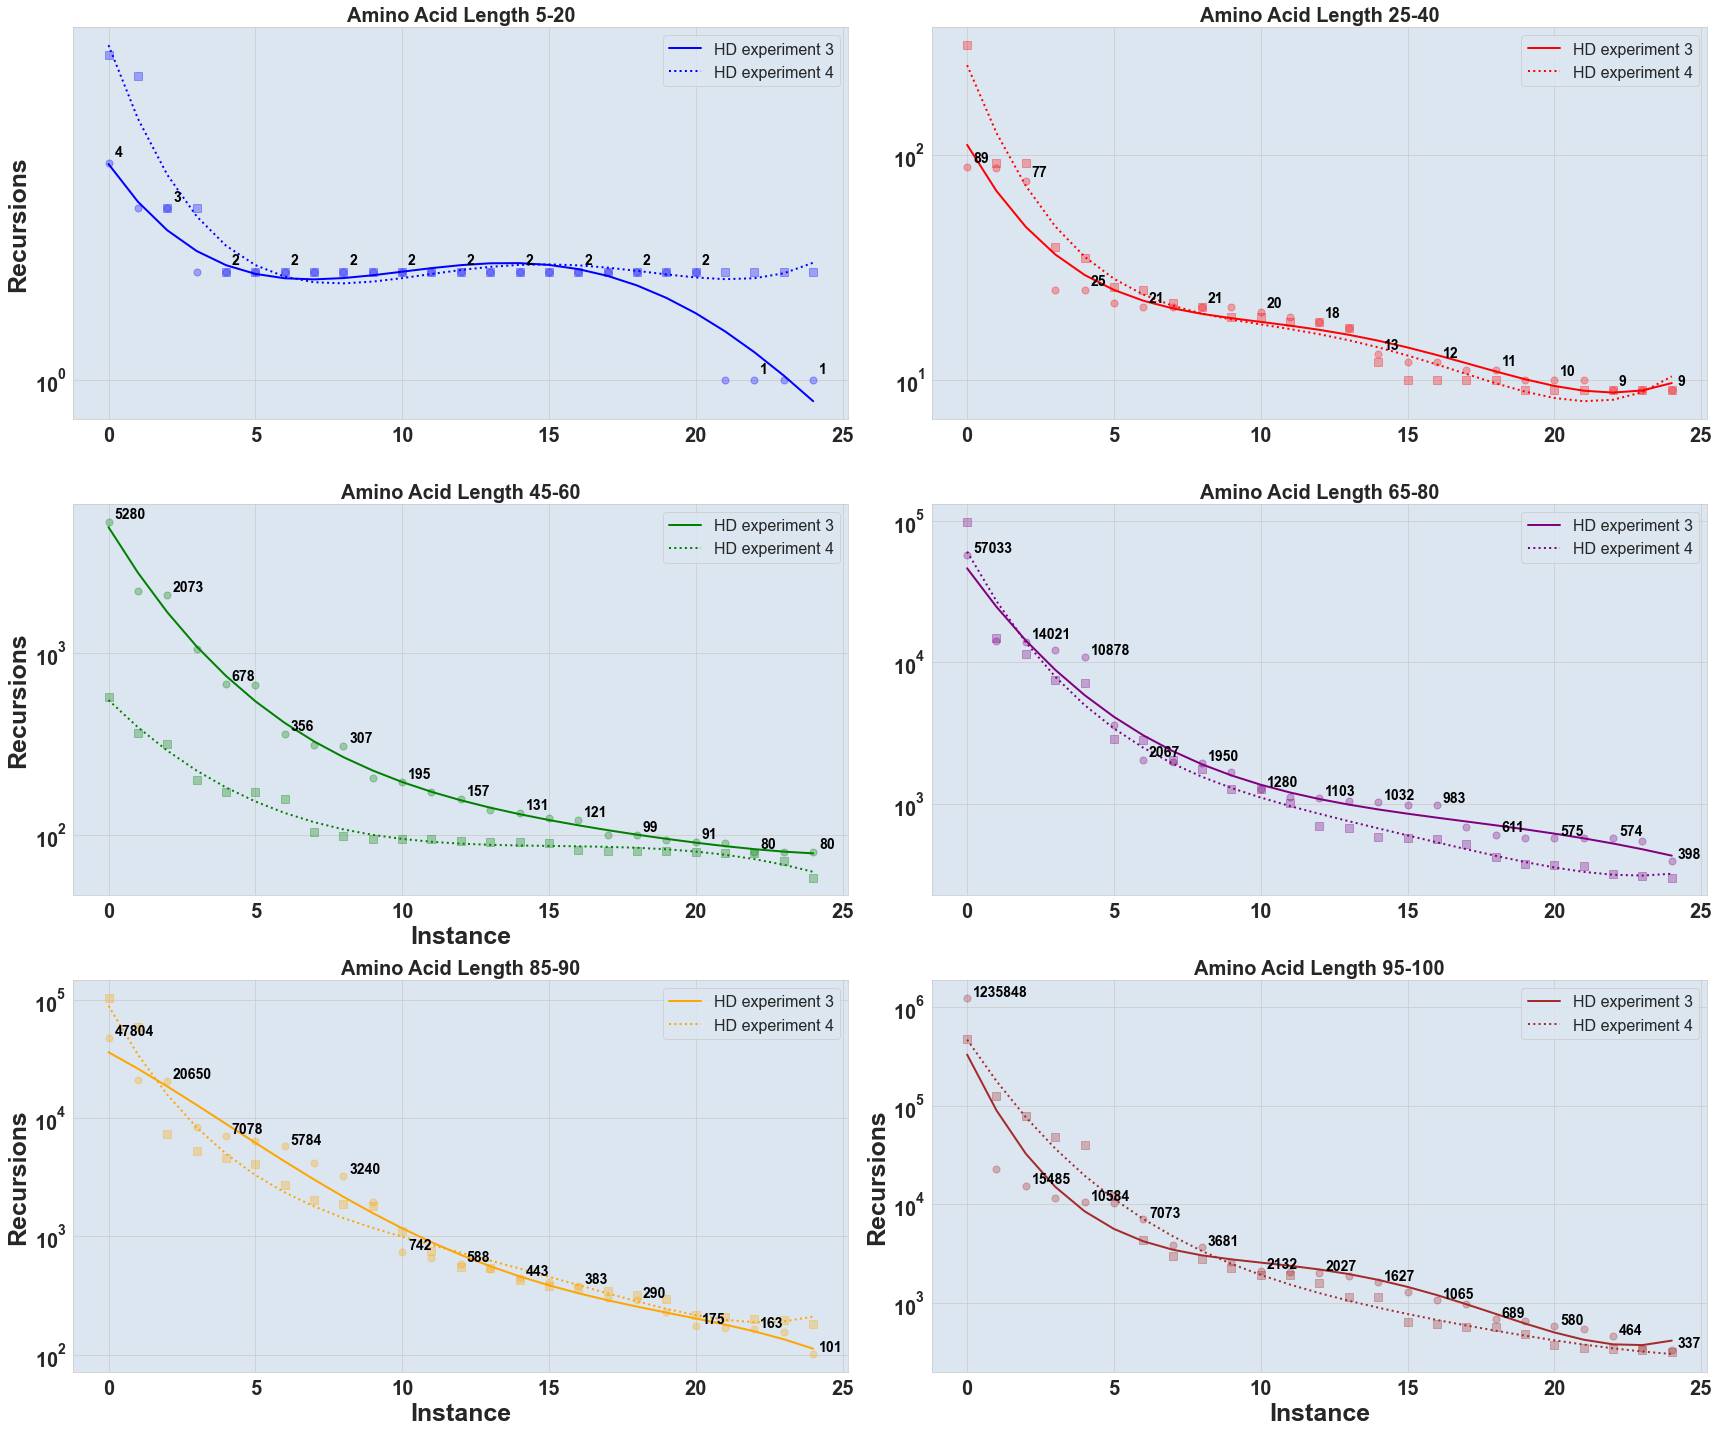

In [8]:
def plot_top_recursions(dataframe, min_length, max_length, ax, color, marker, line_style, show_x_label, show_y_label, show_annotations, subplot_index):
    # Filter dataframe based on amino acid length range
    filtered_df = dataframe[(dataframe['Amino Acid Length'] > min_length) & (dataframe['Amino Acid Length'] <= max_length)]

    # Sort by recursion in descending order and select the top 25
    top_recursions = filtered_df.sort_values(by='Recursions', ascending=False).head(25)

    # Convert range to numpy array for fitting
    x = np.array(range(len(top_recursions)))
    y = top_recursions['Recursions'].values

    # Plot the top 25 recursions with specified color, marker, and line style
    ax.scatter(x, y, color=color, marker=marker, s=50, alpha=0.3)  

    # Optionally add annotations in black color
    if show_annotations:
        for i, value in enumerate(y):
            # Condition to show annotations for all in first two plots, and every other in last two plots
            if subplot_index < 0 or i % 2 == 0:
                ax.text(x[i] + 0.2, value * 1.05, str(value), fontsize=14, color='black', fontweight='bold')

    # Fit a line to the data
    coefficients = np.polyfit(x, np.log(y), 4)
    polynomial = np.poly1d(coefficients)
    y_fit = np.exp(polynomial(x))
    
    if line_style == 'dotted':
        ax.plot(x, y_fit, color=color, linestyle='dotted', linewidth=2, label='HD experiment 4', alpha=1)  # Dotted line style
    else:
        ax.plot(x, y_fit, color=color, linestyle='-', linewidth=2, label='HD experiment 3', alpha=1)  # Solid line style

    # Set the title and labels with similar styling
    ax.set_title(f'Amino Acid Length {min_length}-{max_length}', fontsize=20, fontweight='bold')
    
    if show_x_label:
        ax.set_xlabel('Instance', fontsize=25, fontweight='bold')
    
    if show_y_label:
        ax.set_ylabel('Recursions', fontsize=25, fontweight='bold')

    # Make the values on both axes bold
    ax.tick_params(axis='both', which='major', labelsize=20, width=2)
    for tick in ax.get_xticklabels():
        tick.set_weight('bold')
    for tick in ax.get_yticklabels():
        tick.set_weight('bold')

    # Set the vertical axis to log scale
    ax.set_yscale('log')

    # Customize horizontal axis ticks to 0, 5, 10, 15, 20, 25
    x_ticks = [0, 5, 10, 15, 20, 25]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks)

    # Add the legend
    ax.legend(fontsize=16)

# Apply the seaborn whitegrid style
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

# Create subplots with the desired arrangement
fig, axs = plt.subplots(3, 2, figsize=(24, 20))
length_ranges = [(5, 20), (25, 40), (45, 60), (65, 80), (85, 90), (95, 100)]
colormaps_exp1 = ['Blue', 'Red', 'Green', 'Purple', 'Orange', 'Brown']
colormaps_exp2 = ['Blue', 'Red', 'Green', 'Purple', 'Orange', 'Brown']
marker_exp1 = 'o'  # Circle marker style for the first experiment
marker_exp2 = 's'  # Square marker style for the second experiment
line_style_exp2 = 'dotted'  # Dotted line style for the second experiment
x_labels = [False, False, False, False, True, True]  # Show x labels for the last two plots
y_labels = [True, False, True, False, True, False]   # Show y labels for the first and third plots
show_annotations = [True, True, True, True, True, True]  # Show annotations for all plots

for index, (ax, (min_length, max_length), color_exp1, color_exp2, x_label, y_label, show_annot) in enumerate(zip(axs.ravel(), length_ranges, colormaps_exp1, colormaps_exp2, x_labels, y_labels, show_annotations)):
    plot_top_recursions(HP100_exp1, min_length, max_length, ax, color_exp1, marker_exp1, '-', x_label, y_label, show_annot, index)
    plot_top_recursions(HP100_exp2, min_length, max_length, ax, color_exp2, marker_exp2, line_style_exp2, False, False, False, index)  # Avoid redundant labels

# Modify horizontal and vertical labels for specific plots
axs[1, 0].set_xlabel('Instance', fontsize=25, fontweight='bold')
axs[2, 0].set_xlabel('Instance', fontsize=25, fontweight='bold')
axs[2, 1].set_ylabel('Recursions', fontsize=25, fontweight='bold')

plt.tight_layout()
# plt.savefig("Hardness distribution for recursions 2.png", format='png', dpi=100)
plt.show()
